In [2]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import scipy.ndimage as sp

In [3]:
data = pd.read_csv('Florida_temp_mean_1895_2017(1).csv')

In [4]:
Year = data['Year'].values
Temp = data['Temperature'].values
Anomaly = data['Anomaly'].values
print(Year)
print(Temp)
print(Anomaly)

[1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908
 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922
 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936
 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
[68.7 69.9 70.4 70.1 70.4 69.9 68.  69.9 69.  69.3 70.  69.6 70.5 70.3
 70.2 68.2 71.3 70.  70.  69.1 69.1 69.6 68.8 69.8 70.4 68.9 71.  71.
 70.1 69.4 70.4 69.3 71.1 69.3 70.7  nan 69.9 71.  70.9 69.8 69.8 70.1
 69.8 70.2 70.6 68.2 69.8 69.4 69.5 70.2 70.7 71.2 70.3 71.6 71.6 70.3
 70.4 70.3 70.8 70.1 70.2 69.9 71.  69.  70.6  nan 70.  69.8 69.2 70.
 70.2 69.  70.2 68.6 6

In [5]:
index = np.isnan(Temp)
Temp[index] = np.interp(np.flatnonzero(index),np.flatnonzero(~index), Temp[~index])
pos = np.isnan(Anomaly)
Anomaly[pos] = np.interp(np.flatnonzero(pos),np.flatnonzero(~pos),Anomaly[~pos])
print(Temp)
print(Anomaly)

[68.7 69.9 70.4 70.1 70.4 69.9 68.  69.9 69.  69.3 70.  69.6 70.5 70.3
 70.2 68.2 71.3 70.  70.  69.1 69.1 69.6 68.8 69.8 70.4 68.9 71.  71.
 70.1 69.4 70.4 69.3 71.1 69.3 70.7 70.3 69.9 71.  70.9 69.8 69.8 70.1
 69.8 70.2 70.6 68.2 69.8 69.4 69.5 70.2 70.7 71.2 70.3 71.6 71.6 70.3
 70.4 70.3 70.8 70.1 70.2 69.9 71.  69.  70.6 70.3 70.  69.8 69.2 70.
 70.2 69.  70.2 68.6 69.  69.4 70.4 70.9 70.3 70.9 71.2 69.  69.4 69.7
 69.9 69.9 69.3 71.5 69.3 70.  70.8 71.5 70.2 69.7 71.  72.5 71.8 70.3
 70.3 71.6 70.8 69.9 71.1 72.5 71.2 70.6 70.9 71.3 70.9 70.8 70.8 71.4
 71.8 70.8 71.2 69.2 71.7 71.9 71.7 70.6 73.4 72.5 72.7]
[-1.4 -0.2  0.3  0.   0.3 -0.2 -2.1 -0.2 -1.1 -0.8 -0.1 -0.5  0.4  0.2
  0.1 -1.9  1.2 -0.1 -0.1 -1.  -1.  -0.5 -1.3 -0.3  0.3 -1.2  0.9  0.9
  0.  -0.7  0.3 -0.8  1.  -0.8  0.6  0.2 -0.2  0.9  0.8 -0.3 -0.3  0.
 -0.3  0.1  0.5 -1.9 -0.3 -0.7 -0.6  0.1  0.6  1.1  0.2  1.5  1.5  0.2
  0.3  0.2  0.7  0.   0.1 -0.2  0.9 -1.1  0.5  0.2 -0.1 -0.3 -0.9 -0.1
  0.1 -1.1  0.1 -1.5 -1

In [6]:
#calculate mean and standard deviation

TempAvg = np.mean(Temp)
TempStd = np.std(Temp)
print('Average Temperature is: {}'.format(TempAvg))
print('Standard deviation of Temperature is: {}'.format(TempStd))
AnomAvg = np.mean(Anomaly)
AnomStd = np.std(Anomaly)
print('Anomaly Average is: {}'.format(AnomAvg))
print('Anomaly standard deviation is: {}'.format(AnomStd))

Average Temperature is: 70.3089430894309
Standard deviation of Temperature is: 0.9657557914885666
Anomaly Average is: 0.20894308943089432
Anomaly standard deviation is: 0.9657557914885665


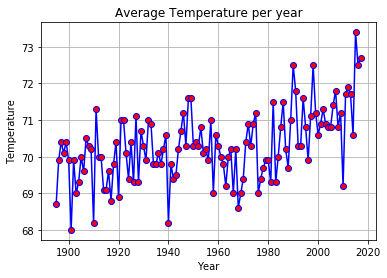

In [7]:
#line graph
axes = pl.axes()
pl.plot(Year,Temp,color = 'blue',marker = 'o',markerfacecolor = 'red')
pl.xlabel('Year')
pl.ylabel('Temperature')
pl.title('Average Temperature per year')
axes.grid();
pl.show()

Text(0.5, 0, 'Temperature')

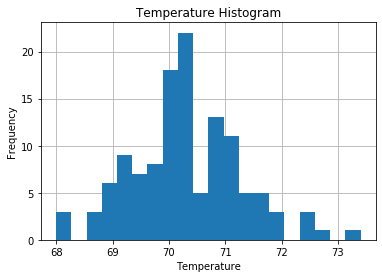

In [8]:
#histogram
axes = pl.axes()
axes.grid()
axes.set_axisbelow(True)
pl.hist(Temp,bins=20,histtype = 'stepfilled')
pl.title('Temperature Histogram')
pl.ylabel('Frequency')
pl.xlabel('Temperature')

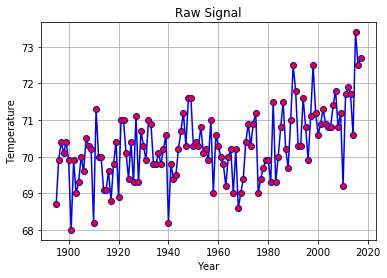

[69.17142857 69.21428571 69.3        69.37619048 69.44761905 69.42380952
 69.54761905 69.60952381 69.67142857 69.69047619 69.70952381 69.75238095
 69.7        69.67142857 69.68571429 69.61428571 69.66666667 69.80952381
 69.81904762 69.83809524 69.89047619 69.85714286 69.92857143 69.87142857
 69.89047619 69.8952381  69.97619048 69.96190476 70.0047619  69.9952381
 70.02857143 70.07619048 70.08571429 70.15238095 70.19047619 70.08571429
 70.12857143 70.05238095 69.98095238 69.98571429 70.04761905 70.08571429
 70.13333333 70.15714286 70.26666667 70.24761905 70.25238095 70.27142857
 70.26190476 70.22380952 70.24285714 70.24761905 70.29047619 70.25238095
 70.27142857 70.25714286 70.34285714 70.34285714 70.33333333 70.35714286
 70.35714286 70.27619048 70.22857143 70.14761905 70.02380952 69.91904762
 69.92380952 69.94761905 69.94761905 69.95238095 70.0047619  69.94761905
 69.92380952 69.86190476 69.9047619  69.87142857 69.82380952 69.8952381
 69.87142857 69.90952381 69.94761905 70.00952381 70.0

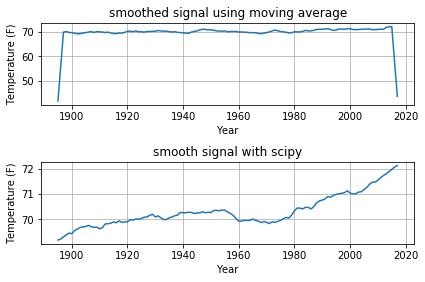

In [14]:
#smooth the curve
axes = pl.axes()
pl.plot(Year,Temp,color = 'blue',marker = 'o',markerfacecolor = 'red')
pl.xlabel('Year')
pl.ylabel('Temperature')
pl.title('Raw Signal')
axes.grid()
pl.show()
smoothsignal = np.correlate(Temp,[.2,.2,.2,.2,.2], mode = 'same')
pl.subplot(2,1,1)
pl.plot(Year,smoothsignal)
pl.gca().grid(True)
pl.xlabel('Year')
pl.ylabel('Temperature (F)')
pl.title('smoothed signal using moving average')
pl.subplot(2,1,2)
C = np.zeros(21,dtype = 'float')
C.fill(1/21)
smoother = sp.correlate(Temp,C,mode = 'nearest')
pl.plot(Year,smoother)
pl.gca().grid(True)
pl.title('smooth signal with scipy')
pl.xlabel('Year')
pl.ylabel('Temperature (F)')
pl.tight_layout(pad = 1.0)

In [15]:
#add smooth signal as column in dataframe
data['SmoothSignal'] = smoothsignal
data['ScipySmoothSignal'] = smoother
print(data)

     Year  Temperature  Anomaly  SmoothSignal  ScipySmoothSignal
0    1895         68.7     -1.4         41.80          69.171429
1    1896         69.9     -0.2         55.82          69.214286
2    1897         70.4      0.3         69.90          69.300000
3    1898         70.1      0.0         70.14          69.376190
4    1899         70.4      0.3         69.76          69.447619
..    ...          ...      ...           ...                ...
118  2013         71.7      1.6         71.86          71.790476
119  2014         70.6      0.5         72.02          71.876190
120  2015         73.4      3.3         72.18          71.966667
121  2016         72.5      2.4         57.84          72.057143
122  2017         72.7      2.6         43.72          72.119048

[123 rows x 5 columns]


In [16]:
#save to csv file
data.to_csv(r'C:\Users\Daniel Diaz\OneDrive\Shared\CSC498\PythonAssignment4\Assignment1_task1_DanielDiaz.csv',header = True)